In [1]:
#For å kjøre GPU framfor CPU
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import pickle
import nibabel as nib
from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split
from fastMONAI.vision_all import *
from PIL import Image 
import PIL 
import numpy.ma as ma
import matplotlib.pyplot as plt
import cv2


c:\Users\Bruker\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = Path('../data/processed/IXI_2d_slices/')
fnames = get_image_files(path / "Axial")
masks = get_image_files(path / "AxialMask")
img_fn = fnames[5]
img = PILImage.create(img_fn)
img.show(figsize=(5,5))

In [6]:
codes = np.loadtxt(path/'code-kopi_kuttet.txt', dtype=str)
codes

array([['0', 'Unknown', '0', '0', '0', '0\\'],
       ['1', 'Left-Cerebral-Exterior', '70', '130', '180', '0\\'],
       ['2', 'Left-Cerebral-White-Matter', '245', '245', '245', '0\\'],
       ...,
       ['702', 'GrayMatter-FSL-FAST', '205', '62', '78', '0\\'],
       ['703', 'WhiteMatter-FSL-FAST', '0', '225', '0', '0\\'],
       ['999', 'SUSPICIOUS', '255', '100', '100', '0\\']], dtype='<U39')

In [7]:
get_msk = lambda o: path/'AxialMask'/f'{o.stem}-mask{o.suffix}'

In [8]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [9]:
(path/"Axial").ls()[0]

Path('../data/processed/IXI_2d_slices/Axial/.DS_Store')

In [10]:
import numpy as np
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [11]:
dls = SegmentationDataLoaders.from_label_func(
     path, bs=8, fnames = fnames, label_func = get_msk, codes = codes
)

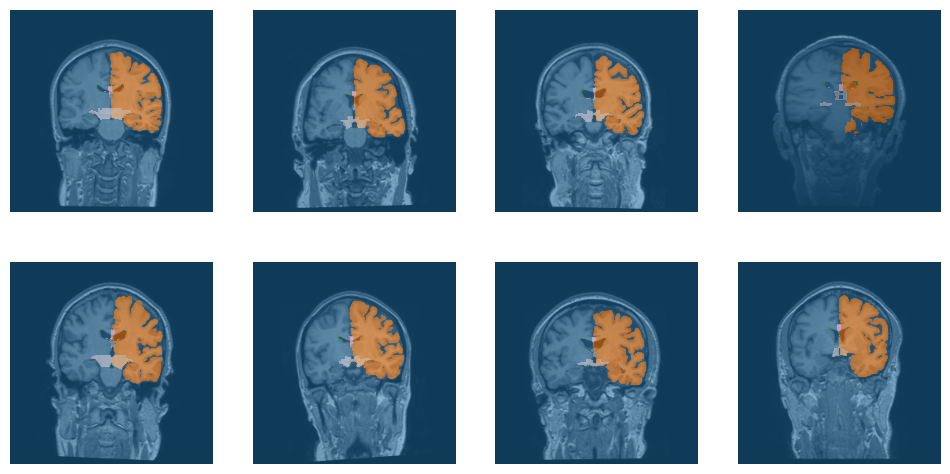

In [12]:
dls.show_batch(max_n=8)

In [13]:
learn = unet_learner(dls, resnet18)

learn.fine_tune(1)

c:\Users\Bruker\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Bruker\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


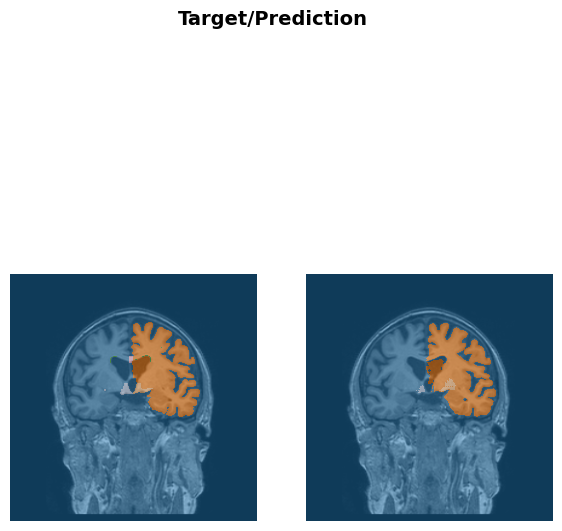

In [14]:
learn.show_results(max_n=1, figsize=(7,8))

In [15]:
learn.summary()

DynamicUnet (Input shape: 8 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 64 x 128 x 128  
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     8 x 64 x 64 x 64    
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=3.981071586167673e-06)

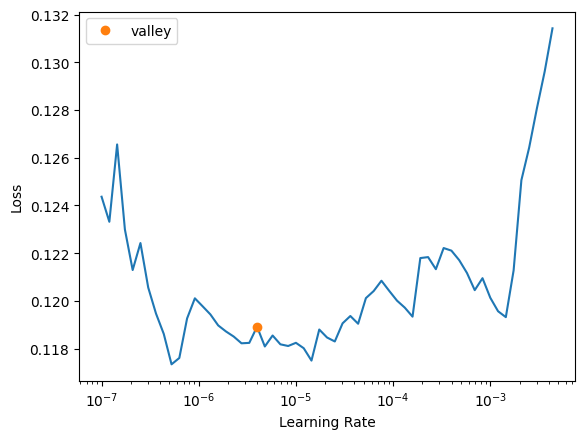

In [16]:
learn.lr_find()

In [17]:
lr = 1e-3

In [19]:
learn.save('stage-1')

In [1]:
learn.load('stage-1')

NameError: name 'learn' is not defined

In [18]:
learn.fit_flat_cos(10, slice(lr))

KeyboardInterrupt: 

In [ ]:
learn.show_results(max_n=4, figsize=(12,6))